In [20]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv("spam.csv",encoding=('ISO-8859-1'))

In [24]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2917,ham,Thanks chikku..:-) gud nyt:-*,NaN,NaN,NaN
4027,ham,Lol its ok I didn't remember til last nite,NaN,NaN,NaN
2241,ham,U buy newspapers already?,NaN,NaN,NaN
862,ham,"Sorry, I guess whenever I can get a hold of my...",NaN,NaN,NaN
1301,ham,I tot u reach liao. He said t-shirt.,NaN,NaN,NaN


In [25]:
df.shape

(5572, 5)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [27]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [28]:
df.sample(5)

,v1,v2
3512,ham,Staff of placement training in Amrita college.
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...
5490,ham,K. I will sent it again
4343,ham,Hi:)did you asked to waheeda fathima about leave?
5372,ham,"Ok., is any problem to u frm him? Wats matter?"


In [29]:
df.rename(columns={'v1':'state','v2':'text'},inplace=True)

In [30]:
df.sample(5)

,state,text
1462,spam,09066362231 URGENT! Your mobile No 07xxxxxxxxx...
201,ham,Hello darlin ive finished college now so txt m...
3149,ham,Yo! Howz u? girls never rang after india. L
791,ham,All e best 4 ur driving tmr :-)
5401,ham,Babes I think I got ur brolly I left it in Eng...


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [34]:
df['state']=encoder.fit_transform(df['state'])

In [35]:
df.sample(5)

,state,text
173,0,"Bloody hell, cant believe you forgot my surnam..."
3503,0,Will you be here for food
3724,0,Nothing spl..wat abt u and whr ru?
3228,1,Ur cash-balance is currently 500 pounds - to m...
844,0,K.k:)when are you going?


In [36]:
df.isnull().sum()

state    0
text     0
dtype: int64

In [37]:
df.duplicated().sum()

403

In [38]:
df=df.drop_duplicates(keep='first')

In [39]:
df.shape

(5169, 2)

In [40]:
df['state'].value_counts()

0    4516
1     653
Name: state, dtype: int64

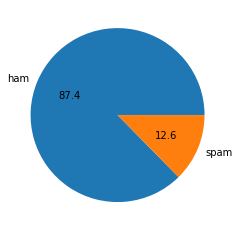

In [45]:
import matplodf['state'].value_counts()tlib.pyplot as plt
plt.pie(df['state'].value_counts(),labels=['ham','spam'],autopct="%0.1f")
plt.show()

In [46]:
import nltk

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FANG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [51]:
df['num_characters']=df['text'].apply(len)

C:\Users\FANG\AppData\Local\Temp/ipykernel_3328/399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           5169 non-null   int32 
 1   text            5169 non-null   object
 2   character       5169 non-null   int64 
 3   num_characters  5169 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 181.7+ KB


In [55]:
df.drop(columns=['character'],inplace=True)

C:\Users\FANG\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
df.head()

,state,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\FANG\AppData\Local\Temp/ipykernel_3328/1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [61]:
df.head()

,state,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [62]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\FANG\AppData\Local\Temp/ipykernel_3328/754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [63]:
df.head()

,state,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [64]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [65]:
df[df['state']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [66]:
df[df['state']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [67]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

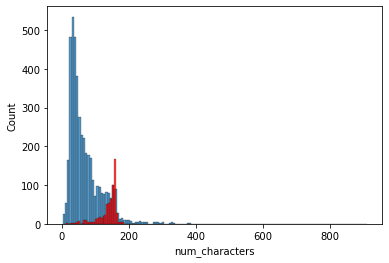

In [68]:
sns.histplot(df[df['state']==0]['num_characters'])
sns.histplot(df[df['state']==1]['num_characters'],color='red')

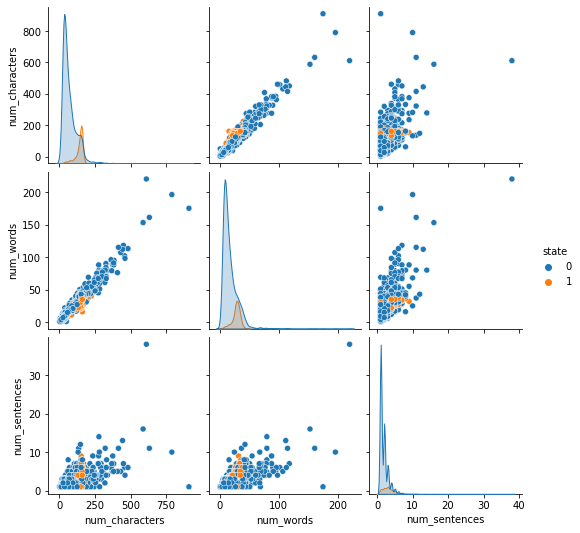

In [69]:
sns.pairplot(df,hue='state')

<AxesSubplot:>

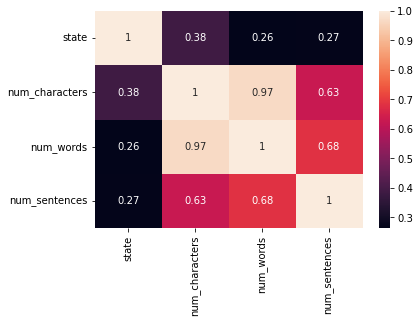

In [70]:
sns.heatmap(df.corr(),annot=True)

In [101]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [94]:
import nltk

In [106]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [103]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [98]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Walking")

'walk'

In [108]:
df['transformed_text']=df['text'].apply(transform_text)

In [109]:
df.head()

,state,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [167]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer()

In [168]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [169]:
X.shape

(5169, 6708)

In [170]:
Y=df['state'].values

In [171]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [174]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [175]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [176]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [177]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [178]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [180]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))